Importing the neccessary packages to complete part 2 of assignment 3

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import os
import glob
from numpy import asarray, save, load
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib.pyplot import imshow
from PIL import Image
import matplotlib.pyplot as plt
from shutil import copy

## Objective 0

Ensuring that the currect working directory is the right directory that holds the 5k of dog and cat images

In [3]:
os.getcwd()
os.chdir(r'C:\Users\jonah.muniz\Documents') 
os.getcwd()

'C:\\Users\\jonah.muniz\\Documents'

Looping through each image and creating two arrays, one containing the file name and the other containing its lable of whether it is a dog (1) or cat(0)

In [5]:
myImgs = []   
imgLabels = []  
for filNam in glob.glob('*.jpg'):
    theLabel=0
    if filNam.startswith('dog'):
        theLabel=1
    animalImg=load_img(filNam, target_size=(200,200))  
    animalImg=img_to_array(animalImg) 
    animalImg=np.divide(animalImg,255.) 
    myImgs.append(animalImg)
    imgLabels.append(theLabel)
myImgs=asarray(myImgs)
imgLabels=asarray(imgLabels)

Saving the two numpy arrays and loading them back into the notebook

In [6]:
save('myImgs.npy',myImgs)
save('imLabels.npy',imgLabels)

In [7]:
imgArray=load('myImgs.npy')
labelArray=load('imLabels.npy')
imgArray.shape
labelArray.shape

(5000, 200, 200, 3)

(5000,)

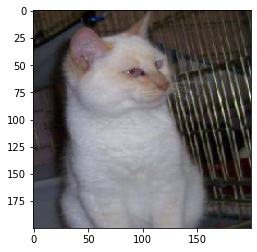

In [8]:
%matplotlib inline
fig = plt.figure()
plt.imshow(imgArray[10,:,:]);

Creating two new folders in the current directory, dog and cat.

In [1]:
os.mkdir(r'C:\Users\jonah.muniz\Documents\dog') 
os.mkdir(r'C:\Users\jonah.muniz\Documents\cat') 

Looping through each image and copying the image into the appropriate folder depending on whether it is a cat or dog image.

In [4]:
for filNam in glob.glob('*.jpg'):
    if filNam.startswith('cat'): copy(filNam,r'C:\Users\jonah.muniz\Documents\cat') 
    else: copy(filNam,r'C:\Users\jonah.muniz\Documents\dog')

Creating a two more folders in the current directory, a validation dog and cat folder.

In [5]:
os.mkdir(r'C:\Users\jonah.muniz\Documents\Vcat')
os.mkdir(r'C:\Users\jonah.muniz\Documents\Vdog')

Looping through the dog folder and assigning moving random subset of images to the validation dog folder

In [6]:
os.chdir(r'C:\Users\jonah.muniz\Documents\dog')
for filNam in glob.glob('*.jpg'):
    randVal=np.random.random_sample()
    if (randVal<0.20): os.rename(filNam,r'C:\Users\jonah.muniz\Documents\Vdog\ ' +filNam)

Identifying how many images are in the dog validation and dog folders

In [9]:
len(os.listdir(r'C:\Users\jonah.muniz\Documents\Vdog'))
len(os.listdir(r'C:\Users\jonah.muniz\Documents\dog'))

489

2011

Looping through the cat folder and moving a random selection of cat images to the validation cat folder

In [10]:
os.chdir(r'C:\Users\jonah.muniz\Documents\cat')
for filNam in glob.glob('*.jpg'):
    randVal=np.random.random_sample()
    if (randVal<0.20): os.rename(filNam,r'C:\Users\jonah.muniz\Documents\Vcat\ ' +filNam)

Identifying the amount of images that are in the cat validation and cat folders

In [11]:
len(os.listdir(r'C:\Users\jonah.muniz\Documents\Vcat'))
len(os.listdir(r'C:\Users\jonah.muniz\Documents\cat'))

501

1999

Now that we have the train and validation images for both dog and cat. We will need to rescale the images to a target size and set the batch size and class mode.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

Rescaling the validation images to the target size of 200x200 and setting the class_mode as binary with a batch size 32.

In [5]:
validate_generator = val_gen.flow_from_directory(
    r'C:\Users\jonah.muniz\documents\validation_1',
    target_size=(200,200),
    batch_size=32,
    class_mode='binary')

Found 990 images belonging to 2 classes.


Rescaling the train images to the target size of 200x200 and setting the class_mode as binary with a batch size 32.

In [6]:
train_generator = train_gen.flow_from_directory(
    r'C:\Users\jonah.muniz\documents\train_1',
    target_size=(200,200),
    batch_size=32,
    class_mode='binary')

Found 4010 images belonging to 2 classes.


Looking at the shape of a couple of the data batches.

In [7]:
aFew=2
howMany=0
for data_batch, labels_batch in train_generator:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')
    howMany+=1
    if (howMany >= aFew): 
        break 

data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)
data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)


## Objective 1

Importing the neccessary packages to create,train, and predict CNNs

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

The below model is a CNN comprising of 1 set of two convolutional layers followed by a max pooling layer. The images are than flatten and taken through two more dense layers before a final output layer. This is the low scenario for the first experiment which is see how one set of two convolutional layers followed by a max pooling layer compares to multiple sets.

In [5]:
model1=models.Sequential([
    layers.Input(shape = (200,200,3)),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(3,3),strides=(3,3)),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1,activation='sigmoid')])

The same loss function, optimizer and metric will be used across all four models. Binary crossentropy is used due to the predictions being either cat or dog. The RMSprop optimizer with a learning rate of 1e-4. Accuracy is the metric.

In [23]:
model1.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [24]:
history = model1.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=30,
    verbose = 0,
    validation_data = validate_generator,
    validation_steps=25)

Epoch 1/30
25/25 [==============================] - 69s 3s/step - loss: 1.4756 - acc: 0.5168 - val_loss: 0.6950 - val_acc: 0.4925
Epoch 2/30
25/25 [==============================] - 68s 3s/step - loss: 0.7818 - acc: 0.5017 - val_loss: 0.9480 - val_acc: 0.4925
Epoch 3/30
25/25 [==============================] - 66s 3s/step - loss: 0.7396 - acc: 0.5268 - val_loss: 0.6651 - val_acc: 0.5825
Epoch 4/30
25/25 [==============================] - 67s 3s/step - loss: 0.6655 - acc: 0.5915 - val_loss: 0.6525 - val_acc: 0.6225
Epoch 5/30
25/25 [==============================] - 63s 3s/step - loss: 0.6717 - acc: 0.5813 - val_loss: 0.6344 - val_acc: 0.6438
Epoch 6/30
25/25 [==============================] - 62s 2s/step - loss: 0.6377 - acc: 0.6124 - val_loss: 0.6477 - val_acc: 0.6187
Epoch 7/30
25/25 [==============================] - 62s 3s/step - loss: 0.6423 - acc: 0.6206 - val_loss: 0.6234 - val_acc: 0.6637
Epoch 8/30
25/25 [==============================] - 63s 3s/step - loss: 0.6474 - acc: 0.63

In [39]:
model1_trainacc = max(history.history['acc'])
model1_valacc = max(history.history['val_acc'])
model1_trainacc
model1_valacc

0.7649999856948853

0.7400000095367432

Model 1 have a training accuracy of 76.5% and a validation accuracy of 74%. It can be seen here that the model is not overfitting. Below the model is saved.

In [30]:
model1.save(r'C:\Users\jonah.muniz\documents\cat_dog_model1.h5')

The below model is the high case in terms of number of sets for the first experiment. Below are 3 sets of two convolutional layers followed by a pooling layer.

In [6]:
model2=models.Sequential([
    layers.Input(shape = (200,200,3)),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(3,3),strides=(3,3)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(3,3),strides=(3,3)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(3,3),strides=(3,3)),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1,activation='sigmoid')])

In [32]:
model2.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [33]:
history = model2.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=30,
    verbose = 0,
    validation_data = validate_generator,
    validation_steps=25)

Epoch 1/30
25/25 [==============================] - 74s 3s/step - loss: 0.6948 - acc: 0.5002 - val_loss: 0.6918 - val_acc: 0.5725
Epoch 2/30
25/25 [==============================] - 72s 3s/step - loss: 0.6912 - acc: 0.5384 - val_loss: 0.7023 - val_acc: 0.4913
Epoch 3/30
25/25 [==============================] - 70s 3s/step - loss: 0.6988 - acc: 0.5068 - val_loss: 0.6852 - val_acc: 0.5650
Epoch 4/30
25/25 [==============================] - 69s 3s/step - loss: 0.6851 - acc: 0.5715 - val_loss: 0.6750 - val_acc: 0.6112
Epoch 5/30
25/25 [==============================] - 74s 3s/step - loss: 0.6782 - acc: 0.5414 - val_loss: 0.6696 - val_acc: 0.6050
Epoch 6/30
25/25 [==============================] - 74s 3s/step - loss: 0.6680 - acc: 0.6369 - val_loss: 0.6693 - val_acc: 0.5900
Epoch 7/30
25/25 [==============================] - 67s 3s/step - loss: 0.6701 - acc: 0.5895 - val_loss: 0.6543 - val_acc: 0.6288
Epoch 8/30
25/25 [==============================] - 71s 3s/step - loss: 0.6470 - acc: 0.66

In [37]:
model2_trainacc = max(history.history['acc'])
model2_valacc = max(history.history['val_acc'])
model2_trainacc
model2_valacc

0.7649999856948853

0.7400000095367432

Model 2 has the same exact train accuracy, 76.5%, and validation accuracy, 74%, as model 1.This will be expanded on more below. The model is saved below as well.

In [41]:
model2.save(r'C:\Users\jonah.muniz\documents\cat_dog_model2.h5')

For the second experiment I will see how varying the threshold of dropout effects accuracy. I will be using model 1 from earlier as my base model and varying the threshold of dropout. The low version of this experiment will be with a dropout threshold of 0.1.

In [7]:
 model3=models.Sequential([
    layers.Input(shape = (200,200,3)),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(3,3),strides=(3,3)),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    layers.Dense(1,activation='sigmoid')]) 

In [43]:
model3.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [44]:
history = model3.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=30,
    verbose = 0,
    validation_data = validate_generator,
    validation_steps=25)

Epoch 1/30
25/25 [==============================] - 58s 2s/step - loss: 1.3075 - acc: 0.4656 - val_loss: 0.8265 - val_acc: 0.4925
Epoch 2/30
25/25 [==============================] - 57s 2s/step - loss: 0.7280 - acc: 0.5418 - val_loss: 0.6760 - val_acc: 0.5813
Epoch 3/30
25/25 [==============================] - 61s 2s/step - loss: 0.6954 - acc: 0.5484 - val_loss: 0.6858 - val_acc: 0.5475
Epoch 4/30
25/25 [==============================] - 55s 2s/step - loss: 0.6989 - acc: 0.5563 - val_loss: 0.6755 - val_acc: 0.5387
Epoch 5/30
25/25 [==============================] - 56s 2s/step - loss: 0.6836 - acc: 0.5526 - val_loss: 0.6653 - val_acc: 0.5462
Epoch 6/30
25/25 [==============================] - 57s 2s/step - loss: 0.6599 - acc: 0.5663 - val_loss: 0.6370 - val_acc: 0.6350
Epoch 7/30
25/25 [==============================] - 55s 2s/step - loss: 0.6330 - acc: 0.6327 - val_loss: 0.6338 - val_acc: 0.6313
Epoch 8/30
25/25 [==============================] - 56s 2s/step - loss: 0.6497 - acc: 0.61

In [45]:
model3_trainacc = max(history.history['acc'])
model3_valacc = max(history.history['val_acc'])
model3_trainacc
model3_valacc

0.8637499809265137

0.7637500166893005

Model 3 with a drop out of 0.1 has a training accuracy of 86.4% and a validation accuracy of 76.4%. I can be seen that this model has the largest amount of overfitting so far. The model is saved below.

In [46]:
model3.save(r'C:\Users\jonah.muniz\documents\cat_dog_model3.h5')

For the high version of the second experiment I will be setting the threshold for the dropout at 0.5.

In [10]:
 model4=models.Sequential([
    layers.Input(shape = (200,200,3)),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(3,3),strides=(3,3)),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')])

In [48]:
model4.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [49]:
history = model4.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=30,
    verbose = 0,
    validation_data = validate_generator,
    validation_steps=25)

Epoch 1/30
25/25 [==============================] - 73s 3s/step - loss: 1.4294 - acc: 0.5168 - val_loss: 0.6955 - val_acc: 0.4950
Epoch 2/30
25/25 [==============================] - 64s 3s/step - loss: 0.7837 - acc: 0.5123 - val_loss: 0.6985 - val_acc: 0.4888
Epoch 3/30
25/25 [==============================] - 65s 3s/step - loss: 0.7460 - acc: 0.4637 - val_loss: 0.6720 - val_acc: 0.6087
Epoch 4/30
25/25 [==============================] - 63s 3s/step - loss: 0.7009 - acc: 0.4937 - val_loss: 0.6732 - val_acc: 0.5625
Epoch 5/30
25/25 [==============================] - 64s 3s/step - loss: 0.6815 - acc: 0.5602 - val_loss: 0.6598 - val_acc: 0.6037
Epoch 6/30
25/25 [==============================] - 63s 3s/step - loss: 0.6687 - acc: 0.5912 - val_loss: 0.6576 - val_acc: 0.6087
Epoch 7/30
25/25 [==============================] - 63s 3s/step - loss: 0.6685 - acc: 0.5528 - val_loss: 0.6546 - val_acc: 0.5775
Epoch 8/30
25/25 [==============================] - 62s 2s/step - loss: 0.6454 - acc: 0.64

In [51]:
model4_trainacc = max(history.history['acc'])
model4_valacc = max(history.history['val_acc'])
model4_trainacc
model4_valacc

0.7673521637916565

0.7362499833106995

Model 4 have a training accuracy of 76.7% and a validation accuracy of 73.6%. The model is saved below.

In [61]:
model4.save(r'C:\Users\jonah.muniz\documents\cat_dog_model4.h5')

Compiling the accuracies of the four models to compare experiments and to see decipher the effects of the different hyperparameters on accuracy.

In [60]:
data = {'Train Accuracy':[model1_trainacc, model2_trainacc, model3_trainacc, model4_trainacc], 
        'Validation Accuracy':[model1_valacc, model2_valacc, model3_valacc, model4_valacc]} 
model_results = pd.DataFrame(data = data, index = ['Model 1: 1 Set of CV layer','Model 2: 3 Sets of CV layers',
                                                   'Model 3: Dropout 0.1','Model 4: Dropout 0.5'])
model_results

,Train Accuracy,Validation Accuracy
Model 1: 1 Set of CV layer,0.765000,0.74000
Model 2: 3 Sets of CV layers,0.765000,0.74000
Model 3: Dropout 0.1,0.863750,0.76375
Model 4: Dropout 0.5,0.767352,0.73625


As can be seen in the summary table above, the best model in terms of validation data accuracy was model 3, which was a CNN with one set of two convolutional layers and a max pooling layer with a dropout of 0.1 after each dense layer. It is interesting to look at the results of the two experiments that were conducted. For the first experiment, it is intersting to see that increasing the amount of sets present in the CNN it does not have an effect on the train or validation accuracy. This was a very shocking result as my hypothesis was that as you inscrease the amount of sets the accuracy would increase. For the second experiment, it can be seen that although using a dropout of 0.1 led to the highest validation accuracy, it also led to the largest amount of overfitting. This leads to a balancing act with the dropout threshold. 

## Objective 2

Model 3 will be loaded back in and used to predict on the test images. The predictions will be either 1 or 0, indication either cat or dog. A threshhold of 0.5 will be used to classify as either 1 or 0.

In [62]:
os.chdir(r'C:\Users\jonah.muniz\Documents\test') 
os.getcwd()

'C:\\Users\\jonah.muniz\\Documents\\test'

In [12]:
testImgs = []     
for filNam in glob.glob('*.jpg'):
    animalImg=load_img(filNam, target_size=(200,200)) 
    animalImg=img_to_array(animalImg) 
    animalImg=np.divide(animalImg,255.)  
    testImgs.append(animalImg)
testImgs=asarray(testImgs)

In [13]:
save('testImgs.npy',testImgs)
testArray=load('testImgs.npy')
testArray.shape

In [16]:
best_model = models.load_model(r'C:\Users\jonah.muniz\documents\cat_dog_model3.h5', compile = True)
predictions = best_model.predict(testArray)

In [17]:
predictions = np.where(predictions > 0.5, 1, 0)